<a href="https://colab.research.google.com/github/vineethchidurala16/23CSBTB50/blob/main/ASS_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
file_path = '/content/archive (15).zip'
data = pd.read_csv(file_path, compression='zip')

In [ ]:
target_column = data.columns[-1]
X = data.drop(columns=[target_column])
y = data[target_column]

In [ ]:
X = pd.get_dummies(X)
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = SVC()
knn_model = KNeighborsClassifier()
log_reg_model = LogisticRegression(max_iter=1000)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

In [ ]:
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

In [ ]:
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

In [ ]:
print(f"SVM Accuracy: {svm_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")

SVM Accuracy: 0.7761194029850746
KNN Accuracy: 0.7164179104477612
Logistic Regression Accuracy: 0.7910447761194029


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
models = {
      "SVM": SVC(kernel="linear", random_state=42),
      "KNN": KNeighborsClassifier(),
      "Logistic Regression": LogisticRegression(random_state=42)

}

In [ ]:
def bootstrap_accuracy(model, X_test, y_test, n_iterations=1000):
    scores = []
    n_size = len(X_test)
    for _ in range(n_iterations):
        indices = np.random.choice(range(n_size), size=n_size, replace=True)
        X_sample = X_test[indices]
        y_sample = y_test[indices]
        scores.append(accuracy_score(y_sample, model.predict(X_sample)))
    return scores

In [ ]:
bootstrap_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)

    bootstrap_scores[name] = bootstrap_accuracy(model, X_test.values, y_test)

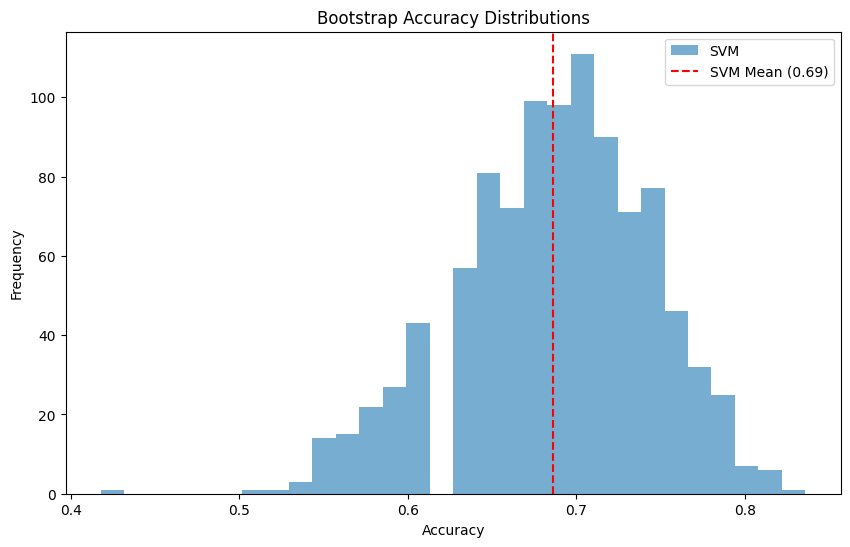

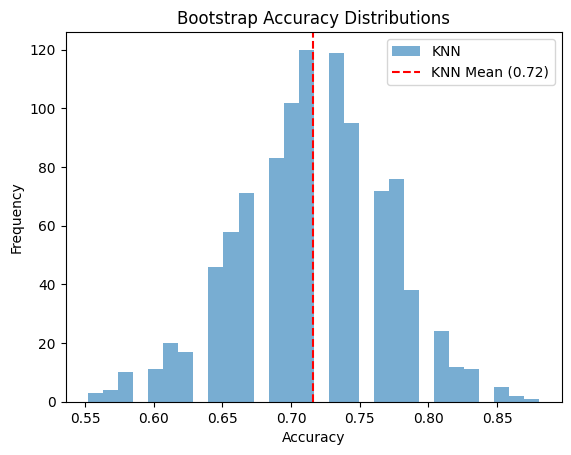

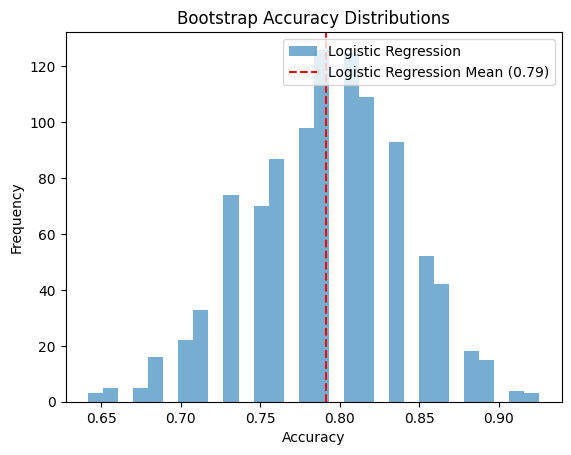

In [ ]:
plt.figure(figsize=(10, 6))
for name, scores in bootstrap_scores.items():
    plt.hist(scores, bins=30, alpha=0.6, label=f"{name}")
    plt.axvline(np.mean(scores), color="red", linestyle="--", label=f"{name} Mean ({np.mean(scores):.2f})")
    plt.title("Bootstrap Accuracy Distributions")
    plt.xlabel("Accuracy")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()